In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Data preparation

In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df = data.copy()

In [20]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [21]:
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
           'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

df = df[columns]

In [22]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [23]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [24]:
df.fillna(0, inplace=True)

In [25]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [26]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


# Q1-What is the most frequent observation (mode) for the column transmission_type?


In [31]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

# Q2-Features with biggest correlation

In [33]:
df[['engine_hp','year','engine_cylinders','highway_mpg','city_mpg']].corr()


,engine_hp,year,engine_cylinders,highway_mpg,city_mpg
engine_hp,1.000000,0.338714,0.774851,-0.415707,-0.424918
year,0.338714,1.000000,-0.040708,0.258240,0.198171
engine_cylinders,0.774851,-0.040708,1.000000,-0.614541,-0.587306
highway_mpg,-0.415707,0.258240,-0.614541,1.000000,0.886829
city_mpg,-0.424918,0.198171,-0.587306,0.886829,1.000000


**city mpg and highway mpg have highest correlation.** 

**We can visualize the correlation between variables with the heat map graph**

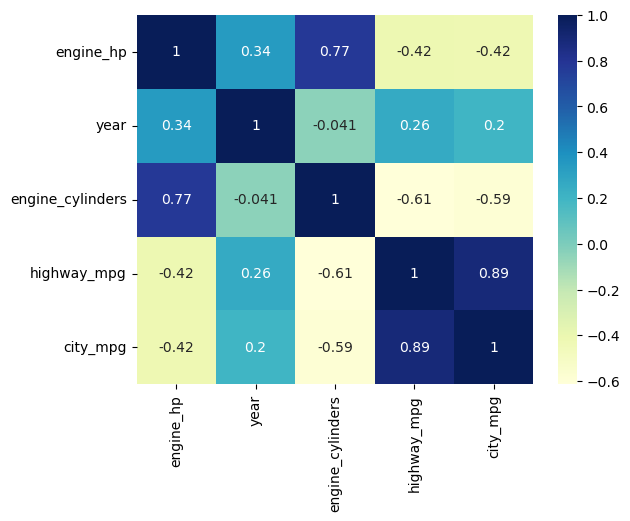

In [35]:
# plotting correlation heatmap
dataplot = sns.heatmap(df[['engine_hp','year','engine_cylinders','highway_mpg','city_mpg']].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# Make price binary

In [37]:
round(df.price.mean())

40595

In [39]:
df['above_average'] = (df.price > df.price.mean().astype(int))
df.drop('price',axis = 1,inplace= True)

# Split Data

In [41]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [42]:
X_train = df_train.drop('above_average', axis=1)
y_train = df_train['above_average']

X_val = df_val.drop('above_average', axis=1)
y_val = df_val['above_average']

X_test = df_test.drop('above_average', axis=1)
y_test = df_test['above_average']

# Q3-Feature with the lowest mutual information score


In [44]:
categorical = ["make", "model", "transmission_type", "vehicle_style"]

for variable in categorical:
    print(variable)
    print(round(mutual_info_score(y_train, df_train[variable]),2))

make
0.24
model
0.46
transmission_type
0.02
vehicle_style
0.08


# Q4-Accuracy of the model


In [45]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(X_train.to_dict(orient='records'))
X_val = dv.transform(X_val.to_dict(orient='records'))

In [46]:

lr = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [47]:
lr.fit(X_train, y_train)

y_pred = lr.predict_proba(X_val)[:, 1]

In [48]:
decisions = y_pred >= 0.5

accuracy_score = round((y_val == decisions).mean(), 2)
accuracy_score

0.95

# Q5- Feature selection - the smallest difference in accuracy


In [49]:
exclude_columns = ['year', 'engine_hp', 'transmission_type', 'city_mpg']

In [50]:
X_train = df_train.drop('above_average', axis=1)
y_train = df_train['above_average']

X_val = df_val.drop('above_average', axis=1)
y_val = df_val['above_average']

X_test = df_test.drop('above_average', axis=1)
y_test = df_test['above_average']

In [51]:
dv = DictVectorizer(sparse=False)
lr = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [52]:
for col in exclude_columns:
    X_train_ = X_train.drop(col, axis=1)
    X_val_ = X_val.drop(col, axis=1)

    X_train_ = dv.fit_transform(X_train_.to_dict(orient='records'))
    X_val_ = dv.transform(X_val_.to_dict(orient='records'))

    lr.fit(X_train_, y_train)
    y_pred = lr.predict_proba(X_val_)[:, 1]
    decisions = y_pred >= 0.5
    print(f'Excluding {col} from the model: {accuracy_score - (y_val == decisions).mean()} difference in accuracy score')

Excluding year from the model: 0.0020352496852705793 difference in accuracy score
Excluding engine_hp from the model: 0.026374318086445636 difference in accuracy score
Excluding transmission_type from the model: 0.004972723457826178 difference in accuracy score
Excluding city_mpg from the model: 0.0037138061267310007 difference in accuracy score


# Q-6 Regression with Scikit-Learn. What's the best alpha?

In [54]:
alphas = [0, 0.01, 0.1, 1, 10]
df = data.copy()

columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
           'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

df = df[columns]

df.columns = df.columns.str.lower().str.replace(' ', '_')

df.fillna(0, inplace=True)

df.rename(columns={'msrp': 'price'}, inplace=True)

In [55]:
df['price'] = np.log1p(df['price'])

In [56]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_val = df_val.drop('price', axis=1)
y_val = df_val['price']

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(X_train.to_dict(orient='records'))
X_val = dv.transform(X_val.to_dict(orient='records'))

In [57]:
for i in alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    y_pred = rr.predict(X_val)
    print(f'Alpha: {i}, RMSE: {round(np.sqrt(((y_val - y_pred) ** 2).mean()), 3)}')

Alpha: 0, RMSE: 5812718365971.966
Alpha: 0.01, RMSE: 0.224
Alpha: 0.1, RMSE: 0.215
Alpha: 1, RMSE: 0.23
Alpha: 10, RMSE: 0.32
